## OUTLIER REMOVAL - IQR

#### 1.5 X IQR RULE
 
Values below  (Q1 - 1.5 IQR) or above (Q3 + 1.5 IQR) are outliers

IQR = Q3 - Q1  (data range contains middle 50 percent of the entries)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [5]:
data = pd.read_csv("scholarship.csv")

In [6]:
data.head()


,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\vxgc2\AppData\Local\Temp\ipykernel_6392\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

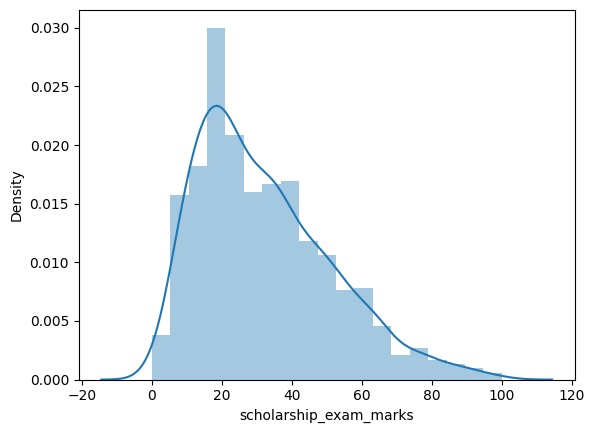

In [7]:
sns.distplot(data["scholarship_exam_marks"])

<Axes: ylabel='scholarship_exam_marks'>

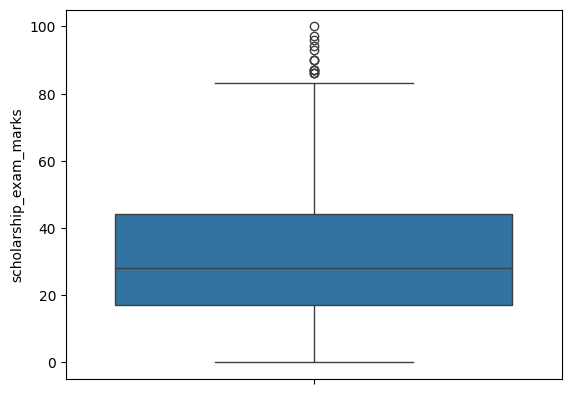

In [8]:
sns.boxplot(data["scholarship_exam_marks"])

In [9]:
Q1 = data["scholarship_exam_marks"].quantile(0.25)
Q3 = data["scholarship_exam_marks"].quantile(0.75)

In [10]:
Q1

17.0

In [11]:
Q3

44.0

In [12]:
IQR = Q3 - Q1

In [13]:
IQR

27.0

In [14]:
min = Q1 - 1.5* IQR
max = Q3 + 1.5* IQR

In [15]:
min

-23.5

In [16]:
max

84.5

In [17]:
data[(data["scholarship_exam_marks"]<min)|(data["scholarship_exam_marks"]> max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


### TRIMMING

In [19]:
new_data = data[(data["scholarship_exam_marks"]>min)&(data["scholarship_exam_marks"]< max)]

C:\Users\vxgc2\AppData\Local\Temp\ipykernel_6392\3464737844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\vxgc2\AppData\Local\Temp\ipykernel_6392\3464737844.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"])


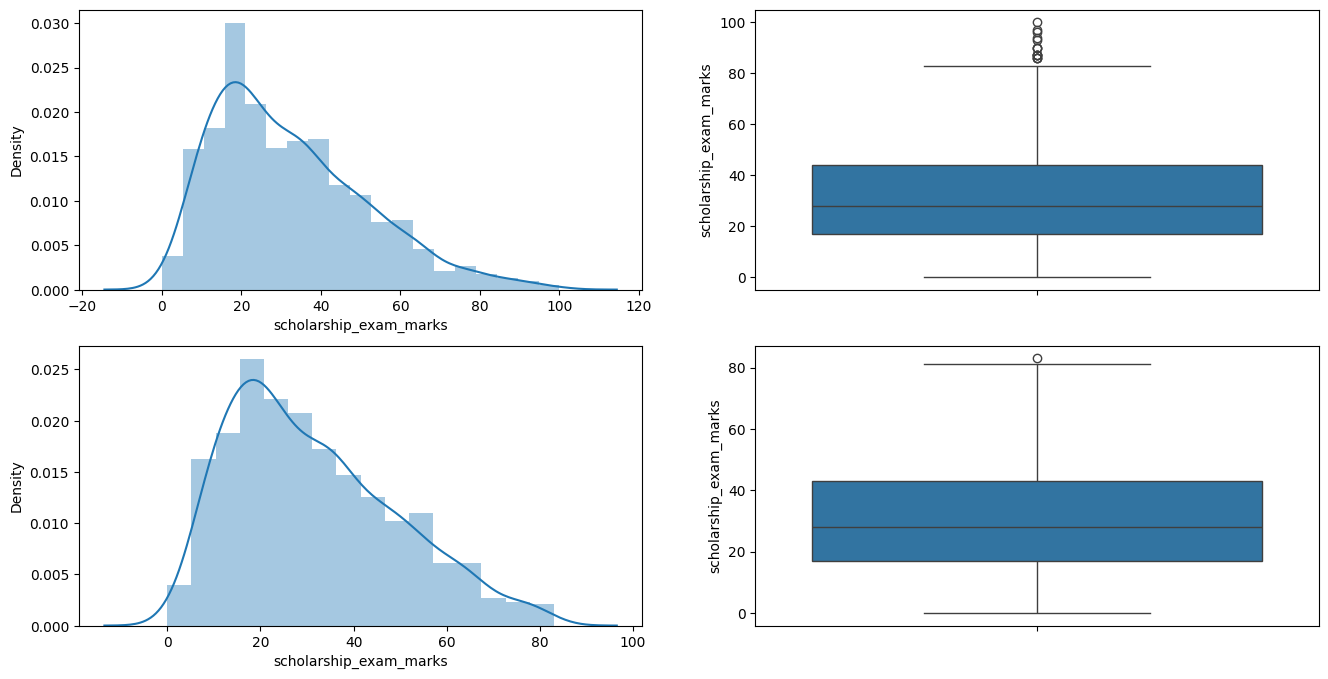

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()




In [22]:
data["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]> max, max, np.where(data["scholarship_exam_marks"]<min,min,data["scholarship_exam_marks"]))

In [23]:
data.shape

(1000, 3)

<Axes: ylabel='scholarship_exam_marks'>

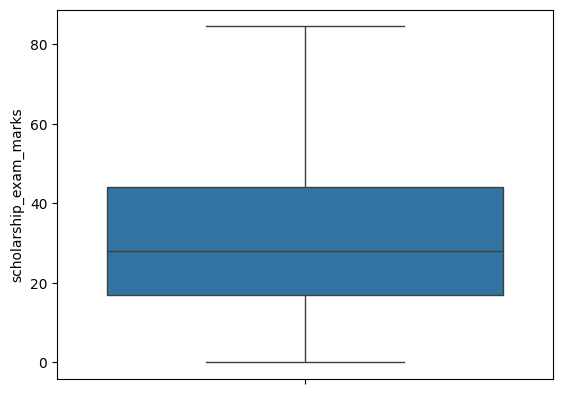

In [25]:
sns.boxplot(data["scholarship_exam_marks"])